
# Project 1: AllLife Credit Card Customer Segmentation : Using Hierarchical Clustering


In [93]:
#Import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.cluster import KMeans

In [94]:
df = pd.read_excel('Credit Card Customer Data.xlsx', index = None)

In [95]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a2274bd10>,
 'caps': [<matplotlib.lines.Line2D at 0x1a22751810>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2274b0d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2274bdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a22759790>],
 'means': []}

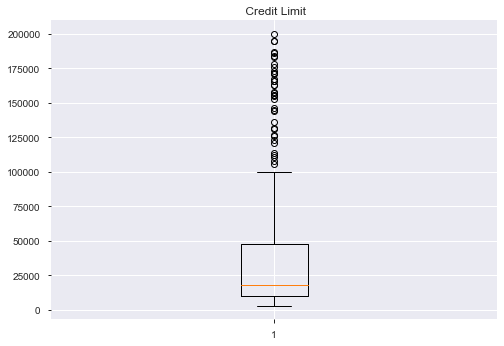

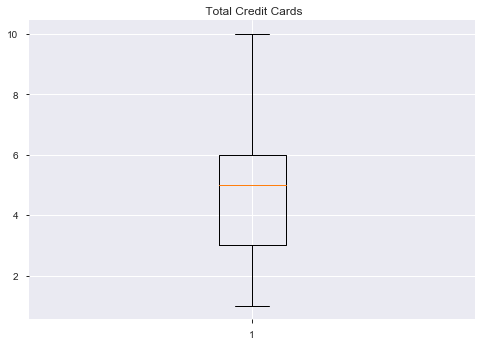

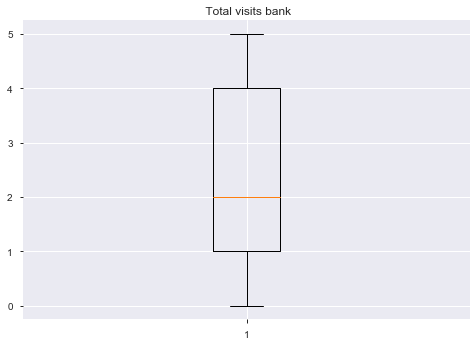

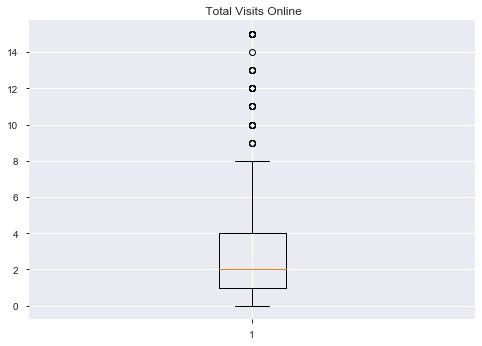

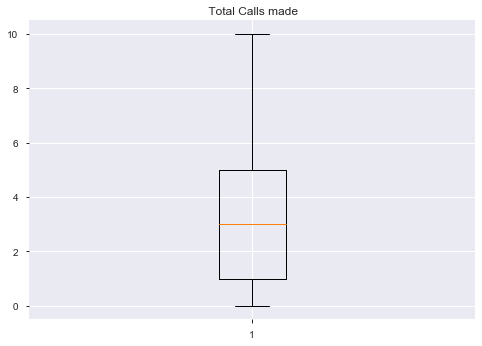

In [96]:
#create boxplot for all the 5 variables
fig1, ax1 = plt.subplots()
ax1.set_title(' Credit Limit')
ax1.boxplot(df['Avg_Credit_Limit'])

fig1, ax2 = plt.subplots()
ax2.set_title(' Total Credit Cards')
ax2.boxplot(df['Total_Credit_Cards'])

fig1, ax3 = plt.subplots()
ax3.set_title(' Total visits bank')
ax3.boxplot(df['Total_visits_bank'])

fig1, ax4 = plt.subplots()
ax4.set_title(' Total Visits Online')
ax4.boxplot(df['Total_visits_online'])

fig1, ax5 = plt.subplots()
ax5.set_title(' Total Calls made')
ax5.boxplot(df['Total_calls_made'])


In [99]:
#Checking number of Zeroes in particular column
df[df['Total_visits_bank'] == 0]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
1,2,38414,50000,3,0,10,9
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
...,...,...,...,...,...,...,...
645,646,48762,171000,10,0,15,0
646,647,58392,186000,7,0,8,1
647,648,79953,183000,9,0,9,2
653,654,51826,95000,10,0,15,1


In [100]:
#Checking number of Zeroes in particular column
df[df['Total_visits_online'] == 0]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
228,229,54838,10000,7,2,0,0
230,231,46635,17000,4,5,0,2
234,235,15129,16000,6,5,0,4
235,236,83290,13000,7,4,0,0
237,238,31903,8000,6,4,0,4
...,...,...,...,...,...,...,...
589,590,46373,29000,4,5,0,2
600,601,99284,68000,7,5,0,0
601,602,47198,33000,5,4,0,2
602,603,67415,37000,7,4,0,1


In [101]:
#Checking number of Zeroes in particular column
df[df['Total_calls_made'] == 0]

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
228,229,54838,10000,7,2,0,0
232,233,83125,20000,5,4,1,0
233,234,35483,13000,7,2,1,0
235,236,83290,13000,7,4,0,0
...,...,...,...,...,...,...,...
645,646,48762,171000,10,0,15,0
648,649,13315,111000,8,1,7,0
652,653,28525,156000,8,1,8,0
655,656,51108,99000,10,1,10,0


In [102]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='AllLife Credit card data Profiling Report')

In [55]:
profile

In [103]:
#Drop first two columns S.NO and Customer Key
dfAttr = df.iloc[:, 2:]
dfAttr

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
...,...,...,...,...,...
655,99000,10,1,10,0
656,84000,10,1,13,2
657,145000,8,1,9,1
658,172000,10,1,15,0


# Splitting the data on Independent and dependent variable

In [104]:
#independent and dependent variables
X=dfAttr.iloc[:,1:5]
y = dfAttr.iloc[:,0]

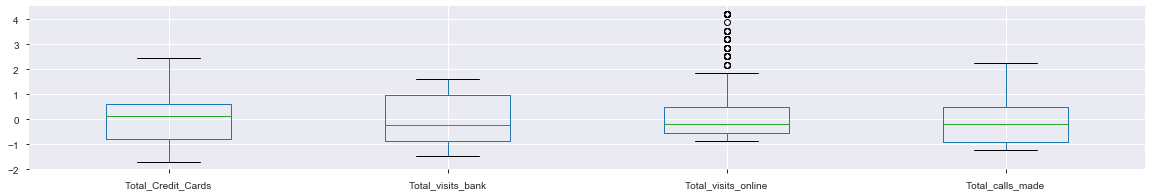

In [105]:
from scipy.stats import zscore
X_zscore=X.apply(zscore)

X_zscore.boxplot(figsize=(20,3))

In [106]:
#Variables are now scaled. Let us now try to create clusters

cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(X_zscore)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,2640.000000
1,2,1496.252484
2,3,753.338669
3,4,601.962926
4,5,526.503504
5,6,482.869634
6,7,457.347449
7,8,407.850034
8,9,391.403927
9,10,366.086541


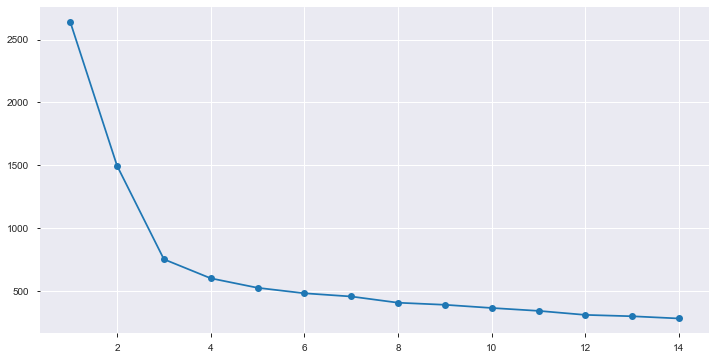

In [107]:
from matplotlib import cm

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [108]:
# We could see the bend at 4, so let us create 4 custers

kmeans = KMeans(n_clusters=4, n_init = 5, random_state=12345)
kmeans.fit(X_zscore)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [109]:
# Check the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[201  50 190 219]


In [110]:
# Distribution looks fine.

# let us check the centers in each group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_zscore) )
centroid_df.transpose()

,0,1,2,3
Total_Credit_Cards,0.369959,1.862226,0.356795,-1.074265
Total_visits_bank,0.039637,-1.105763,1.295713,-0.908057
Total_visits_online,-0.550882,2.827319,-0.543901,0.331975
Total_calls_made,-0.519990,-0.874330,-0.575064,1.175783


# Additonal analysis using scaled data.

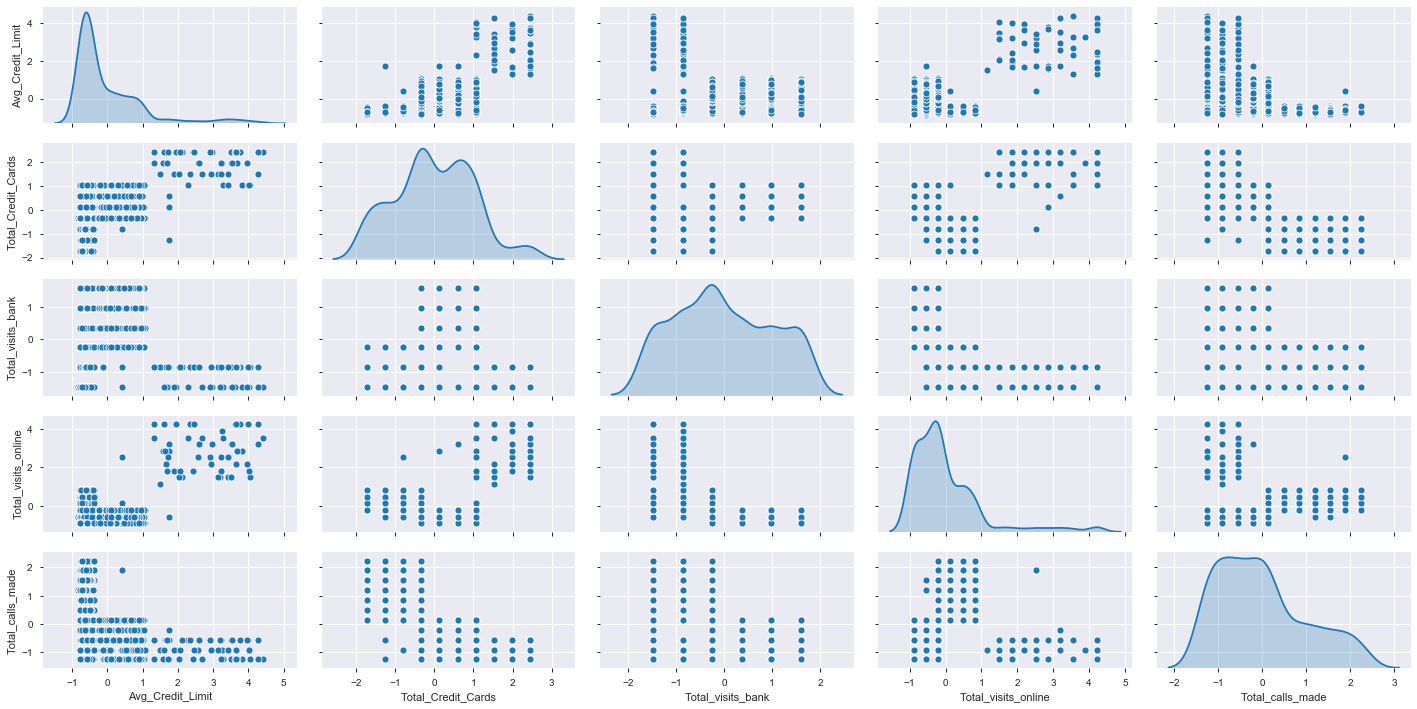

In [111]:
#Create Pairplot to check the correlation between data 
sns.pairplot(dfAttrScaled, height = 2, aspect =2, diag_kind = 'kde')

In [113]:
#Import Libraries for analysis using hierarchical clustering 
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage

In [114]:
from scipy.spatial.distance import pdist

In [115]:
z = linkage(dfAttrScaled, metric = 'euclidean' , method = 'average')
c, coph_dist = cophenet(z, pdist(dfAttrScaled)) 
c

0.8977080867389372

In [116]:
#Reapplying Standard scalar on Unscaled dataframe
from sklearn.preprocessing import StandardScaler
import numpy as np
sc = StandardScaler()
X_std = pd.DataFrame(sc.fit_transform(dfAttr ),columns=dfAttr.columns)

In [117]:
X_std.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [118]:
#### generate the linkage matrix
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(X_std, 'ward', metric='euclidean')
Z.shape

(659, 4)

In [119]:
Z[:]

array([[ 464.        ,  497.        ,    0.        ,    2.        ],
       [ 425.        ,  455.        ,    0.        ,    2.        ],
       [ 250.        ,  361.        ,    0.        ,    2.        ],
       ...,
       [1313.        , 1314.        ,   16.84480374,  385.        ],
       [1311.        , 1316.        ,   47.06715339,  435.        ],
       [1315.        , 1317.        ,   50.16298666,  660.        ]])

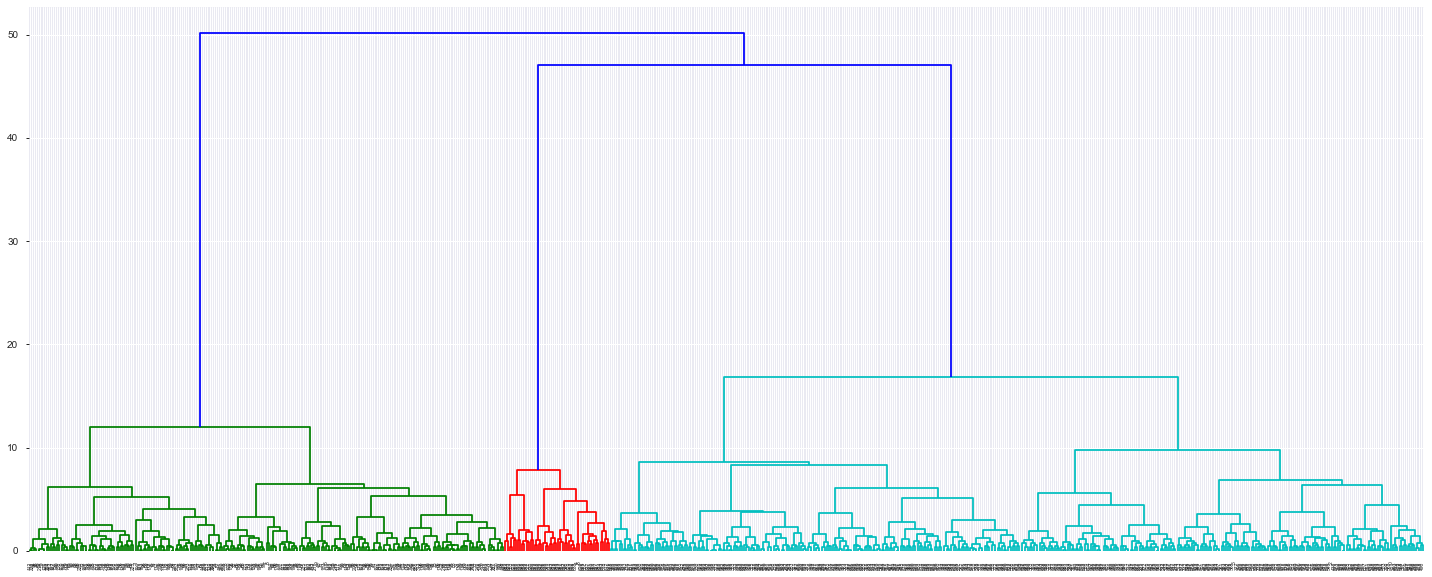

In [120]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

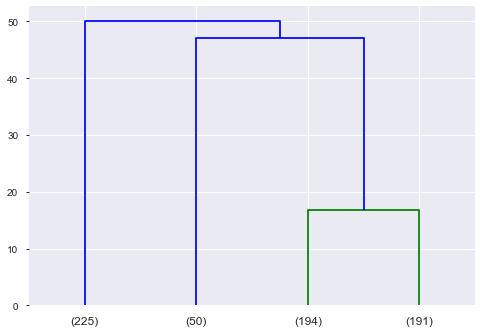

In [90]:
# Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(Z, truncate_mode='lastp',  # show only the last p merged clusters
    p=4,  # show only the last p merged clusters
)
plt.show()

From the above two method we get similar result in terms of grouping :
    K mean  - 201, 50,  190,  219
    Hierarchical Clustering - 225, 50, 194, 191

In [133]:
#Applying silhoutte analysis to get score for Clustering we did
from sklearn.metrics import silhouette_samples, silhouette_score
s = silhouette_score(X, y, metric='euclidean',sample_size=int(50))
s

-0.29163073750978424